In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## DataSet Link - https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data?select=gld_price_data.csv

In [20]:
df = pd.read_csv('gld_price_data.csv')

In [21]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [22]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [24]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [25]:
df.shape

(2290, 6)

In [33]:
df.corr

<bound method DataFrame.corr of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

/tmp/ipykernel_77/3736964373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<AxesSubplot: xlabel='GLD', ylabel='Density'>

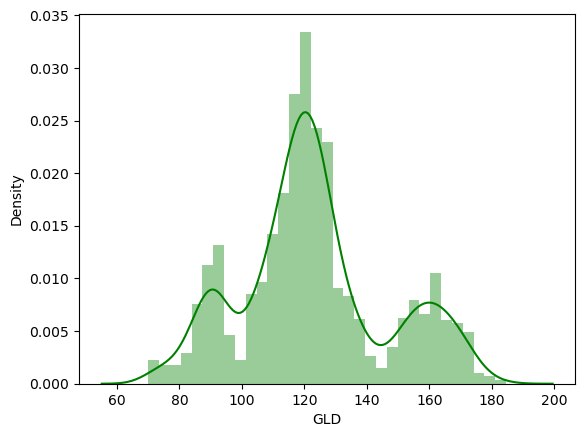

In [34]:
sns.distplot(df['GLD'],color='green')

In [36]:
# spliting the features and target

X = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [37]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [38]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
X_train.shape

(1832, 4)

In [41]:
y_train.shape

(1832,)

In [42]:
# model training
model = RandomForestRegressor(n_estimators=100)

In [43]:
model

RandomForestRegressor()

In [44]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
# model evalutation
Test_data_prediction = model.predict(X_test)

In [46]:
Test_data_prediction

array([168.23989932,  82.18559982, 116.04480052, 127.73740078,
       120.64850115, 154.58259794, 150.60679819, 126.15790036,
       117.5390989 , 125.95150085, 116.48670105, 172.25240096,
       141.48889806, 167.59229902, 115.29309996, 117.69930043,
       137.8184038 , 170.11240147, 159.17210318, 159.37209964,
       155.20860023, 125.23450024, 176.28199912, 157.52610368,
       125.24290035,  93.9253998 ,  77.64420006, 120.56640017,
       119.0484992 , 167.53920009,  88.14100051, 125.36320016,
        91.00660073, 117.6515005 , 121.06499868, 136.15810014,
       115.67530102, 115.04010071, 147.75740007, 107.34350076,
       104.55310209,  87.13949794, 126.57680062, 117.98110033,
       153.61329881, 119.67739995, 108.38959993, 108.19919791,
        93.2121008 , 127.16229795,  75.58830005, 113.65609923,
       121.34120006, 111.33279923, 118.72769887, 120.75629924,
       159.00569956, 168.23040144, 146.58349684,  85.80819864,
        94.12730027,  86.78469937,  90.55910001, 119.01

In [48]:
# R squared error
error = metrics.r2_score(y_test,Test_data_prediction)
print('R squared Error:',error)

R squared Error: 0.9888088976307585


In [49]:
y_test = list(y_test)

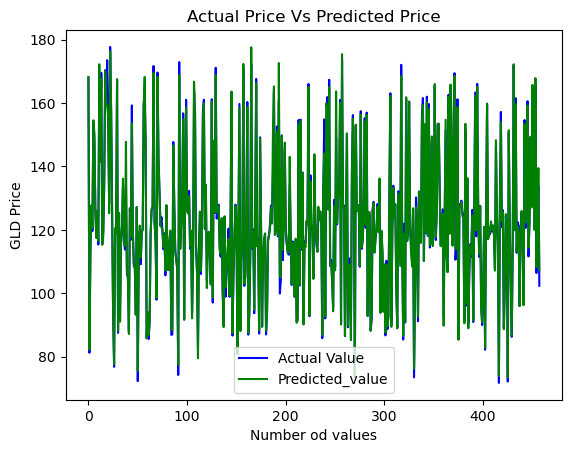

In [52]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(Test_data_prediction,color='green',label='Predicted_value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number od values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()